In [1]:
import pandas as pd
import numpy as np
import itertools

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score, classification_report,accuracy_score
)

from lightgbm import LGBMClassifier

In [2]:
train=pd.read_csv("DataSet/Train.csv")

In [3]:
print("Train Data")
print(train.head())

Train Data
              ID  I/O Data Operations   I/O Data Bytes  \
0  ID_4W8AP96UO6           114.798900      3790.450939   
1  ID_UD3TM0ZYND            14.154240      5182.451722   
2  ID_XAG1HC0HWM             0.044444       120.821253   
3  ID_CEXD05IR09            31.369916    127228.251100   
4  ID_X6E97FT8IF             5.046181      1091.620117   

   Number of subprocesses  Time on processor  Disk Reading/sec  \
0                    28.0           0.427078          6.162365   
1                    28.0           0.138876          5.399498   
2                    28.0           0.000000          1.577765   
3                    31.0           0.523750         15.981107   
4                    25.0           0.069468          1.356022   

   Disc Writing/sec  Bytes Sent/sent  Received Bytes (HTTP)  \
0         21.220403        58.492773              63.959387   
1          0.000000        22.886762              29.508369   
2          0.000000        11.733239              12.8

In [4]:
train.shape

(8908, 16)

In [5]:
train.isnull().sum()

ID                          0
I/O Data Operations         0
 I/O Data Bytes             0
Number of subprocesses      0
Time on processor           0
Disk Reading/sec            0
Disc Writing/sec            0
Bytes Sent/sent             0
Received Bytes (HTTP)       0
Network packets sent        0
Network packets received    0
Pages Read/sec              0
Pages Input/sec             0
Page Errors/sec             0
Confirmed byte radius       0
Label                       0
dtype: int64

In [6]:
train.duplicated().any()

np.False_

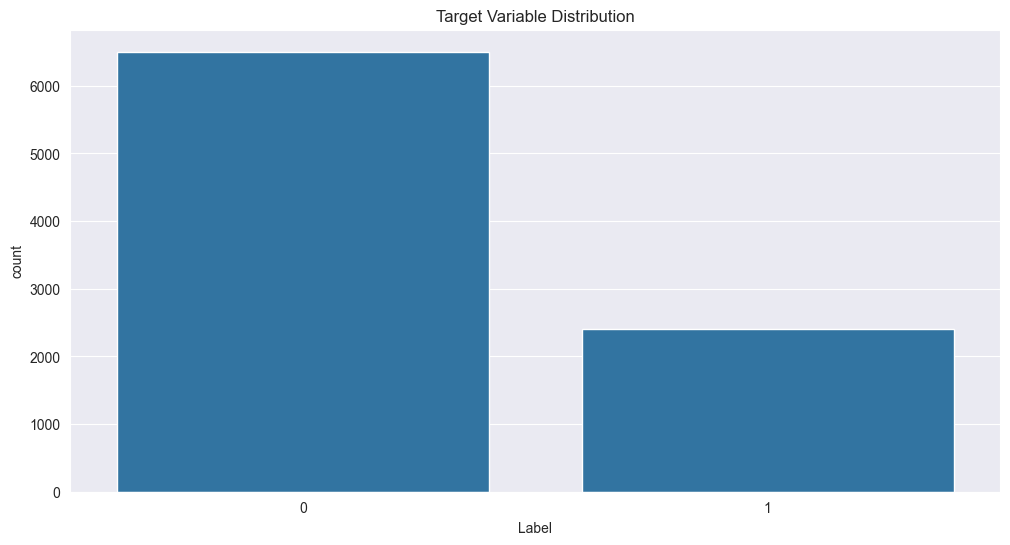

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.countplot(x='Label',data=train)
plt.title('Target Variable Distribution')
plt.show()

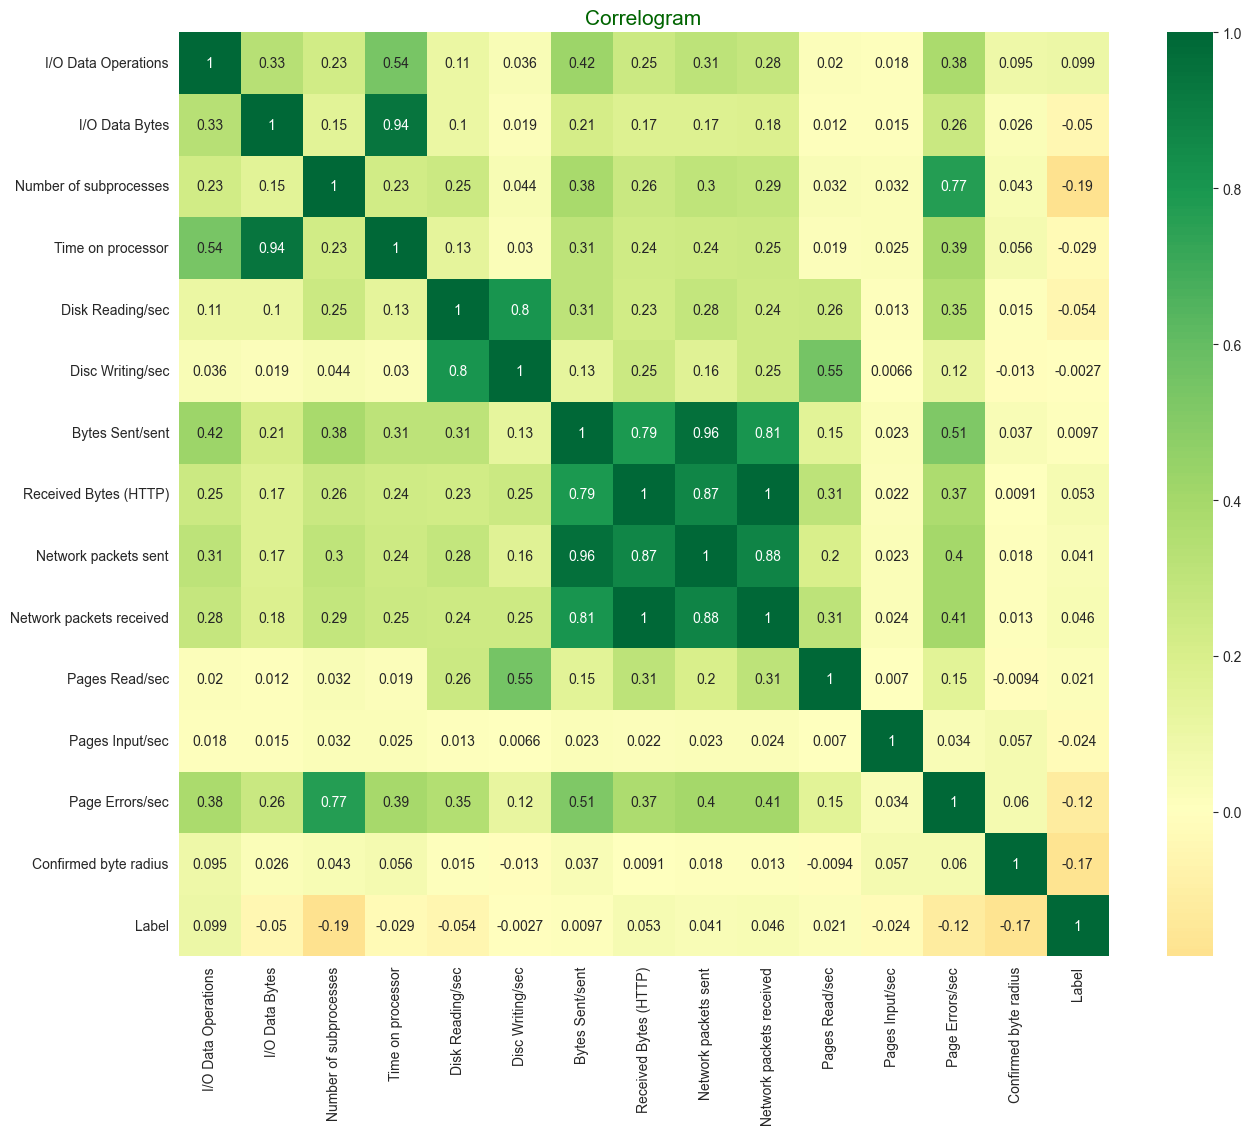

In [8]:
corr = train.select_dtypes(include='number').corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,cmap='RdYlGn',annot =True,center=0)
plt.title('Correlogram',fontsize=15,color='darkgreen')
plt.show()

In [9]:
features=train.drop(columns=['ID','Label']).columns
target='Label'

In [10]:
X_train,X_test,y_train,y_test=train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [11]:
base_model = LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        class_weight='balanced',
        random_state=42
    )

rfecv = RFECV(
        estimator=base_model,
        step=1,
        cv=5,
        scoring='f1',
        min_features_to_select=5,
        n_jobs=-1
    )

rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_]
X_train_fs = X_train[selected_features]
X_test_fs  = X_test[selected_features]
print("Selected features:")
print(list(selected_features))
print("Number of selected features:", len(selected_features))

C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1923, number of negative: 5203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 7126, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1923, number of negative: 5203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3095
[LightGBM] [Info] Number of data points in the train set: 7126, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1923, number of negative: 5203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2840
[LightGBM] [Info] Number of data points in the train set: 7126, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1923, number of negative: 5203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2585
[LightGBM] [Info] Number of data points in the train set: 7126, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1923, number of negative: 5203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2585
[LightGBM] [Info] Number of data points in the train set: 7126, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Selected features:
['I/O Data Operations', ' I/O Data Bytes', 'Number of subprocesses', 'Time on processor', 'Disk Reading/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)', 'Network packets sent', 'Network packets received', 'Page Errors/sec', 'Confirmed byte radius']
Number of selected features: 11


In [12]:
lgbm=LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    class_weight='balanced',
    random_state=42
)

lgbm.fit(X_train_fs, y_train)

C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manuk\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1923, number of negative: 5203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2585
[LightGBM] [Info] Number of data points in the train set: 7126, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [13]:
y_pred = lgbm.predict(X_test_fs)
y_prob = lgbm.predict_proba(X_test_fs)[:, 1]

In [14]:
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("F1 Score     :", f1_score(y_test, y_pred))
print("Precision    :", precision_score(y_test, y_pred))
print("Recall       :", recall_score(y_test, y_pred))

Accuracy score :  0.9775533108866442
F1 Score     : 0.9578947368421052
Precision    : 0.9701492537313433
Recall       : 0.9459459459459459


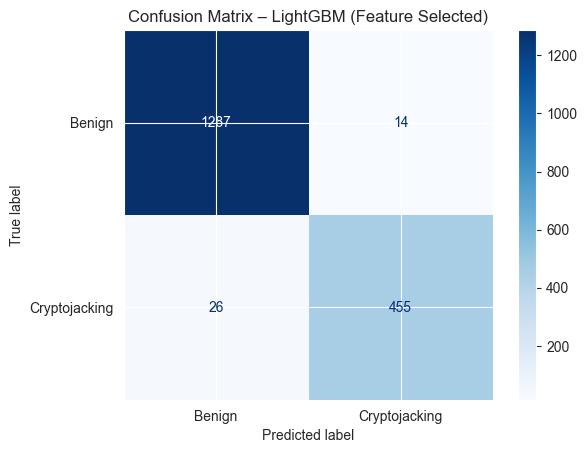

In [15]:
cm=confusion_matrix(y_test, y_pred)

disp=ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Benign", "Cryptojacking"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – LightGBM (Feature Selected)")
plt.show()

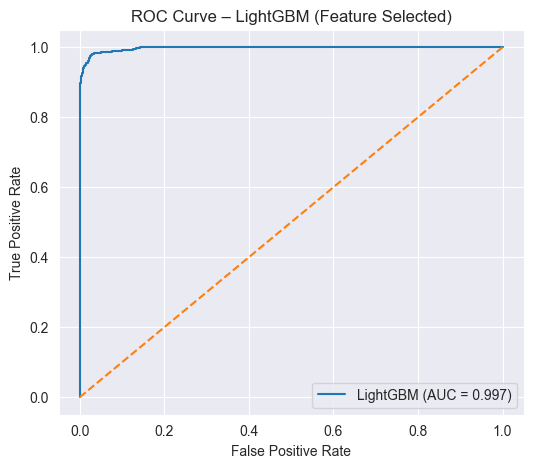

In [16]:
fpr, tpr, _=roc_curve(y_test, y_prob)
auc=roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – LightGBM (Feature Selected)")
plt.legend()
plt.show()

In [17]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9802    0.9892    0.9847      1301
           1     0.9701    0.9459    0.9579       481

    accuracy                         0.9776      1782
   macro avg     0.9752    0.9676    0.9713      1782
weighted avg     0.9775    0.9776    0.9775      1782



In [18]:
import joblib

joblib.dump(lgbm,"lightgbm_cryptojacking_model.pkl")

joblib.dump(list(selected_features),"selected_features.pkl")

print("Model and features saved successfully!")

Model and features saved successfully!
